In [5]:
# --- DATA CONSOLIDATION ---

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Datasets
df_balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
df_income_statement = pd.read_excel("data/Income_Statement.xlsx")

# 2. Merge Datasets
# Combining Balance Sheet and Income Statement based on Company, Type, and Year
merged_df = pd.merge(
    df_balance_sheet,
    df_income_statement,
    on=['company', 'comp_type', 'Year'],
    how='inner'
)

# 3. Data Quality Checks
print(merged_df.isnull().sum())
num_duplicates = merged_df.duplicated().sum()
print(f"Total Duplicates: {num_duplicates}")
merged_df.info()

# --- FINANCIAL METRIC ENGINEERING ---

# Define the profit metric used for calculations
net_income_proxy = 'Operating Income'

# Calculate Key Financial Ratios
# Using .replace(0, np.nan) to handle potential division by zero errors

# 1. Profitability Ratios
merged_df['Net_Profit_Margin'] = merged_df[net_income_proxy] / merged_df['Total Revenue'].replace(0, np.nan)
merged_df['ROE'] = merged_df[net_income_proxy] / merged_df['Total Stockholder Equity'].replace(0, np.nan)
merged_df['ROA'] = merged_df[net_income_proxy] / merged_df['Total Assets'].replace(0, np.nan)

# 2. Leverage & Liquidity Ratios
merged_df['Debt_to_Equity'] = merged_df['Total Liab'] / merged_df['Total Stockholder Equity'].replace(0, np.nan)
merged_df['Current_Ratio'] = merged_df['Total Current Assets'] / merged_df['Total Current Liabilities'].replace(0, np.nan)

# Create a final clean view with selected columns
final_view = merged_df[[
    'company', 
    'Year', 
    'comp_type', 
    'Net_Profit_Margin', 
    'ROE', 
    'ROA', 
    'Debt_to_Equity', 
    'Current_Ratio'
]]

print(final_view.round(2).head(10))

Unnamed: 0_x                  0
Year                          0
comp_type                     0
company                       0
Accounts Payable              0
Cash                          0
Inventory                    16
Property Plant Equipment      0
Short Term Investments       23
Total Assets                  0
Total Current Assets          0
Total Current Liabilities     0
Total Liab                    0
Total Stockholder Equity      0
Unnamed: 0_y                  0
Cost Of Goods Sold            0
Gross Profit                  0
Operating Income              0
Total Operating Expenses      0
Total Revenue                 0
dtype: int64
Total Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0_x               60 non-null     int64  
 1   Year                       60 non-null     int64  



 Average Performance by Industry
           Net_Profit_Margin   ROE  Debt_to_Equity
comp_type                                         
fmcg                    0.21  0.53            3.00
real_est                0.30  0.44            5.69
tech                    0.27  0.53            1.78


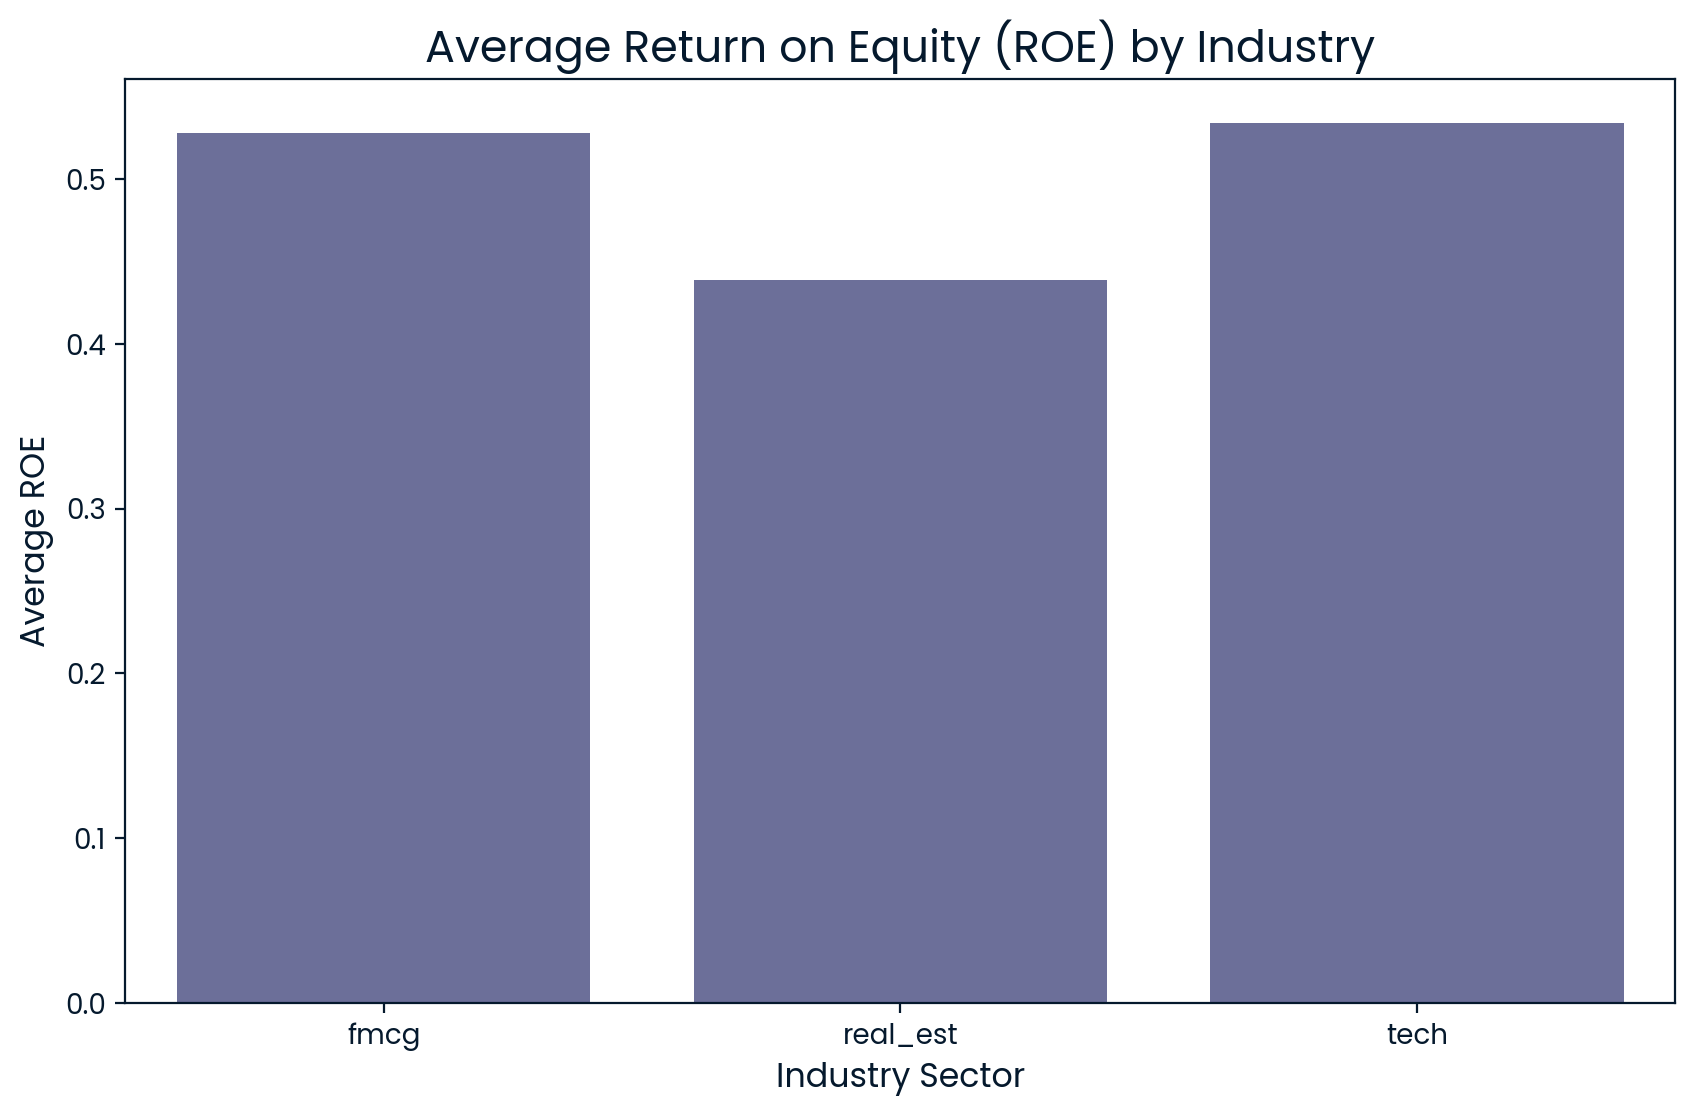

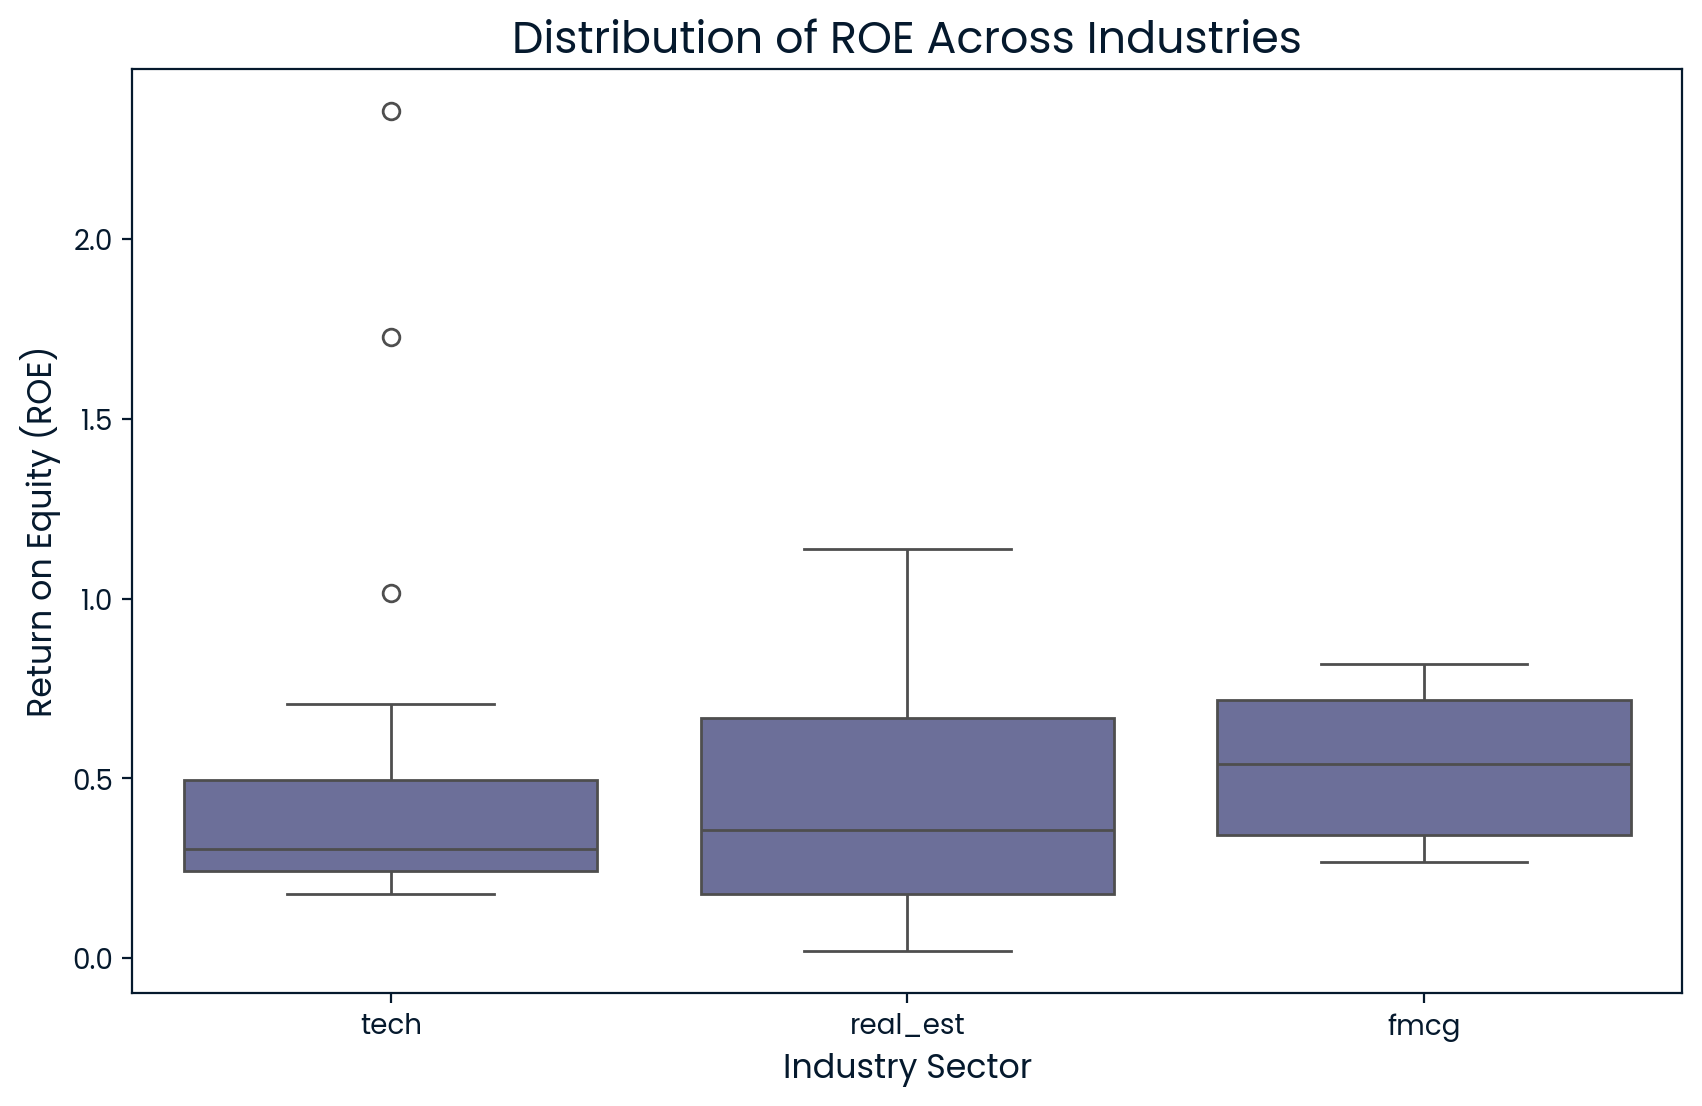

In [2]:
# --- ANALYSIS 1: INDUSTRY COMPARISON ---

industry_performance = merged_df.groupby('comp_type')[['Net_Profit_Margin', 'ROE', 'Debt_to_Equity']].mean()

print("\n Average Performance by Industry")
print(industry_performance.round(2))

# 1. Bar Chart: Average ROE by Industry
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_performance.index, y='ROE', data=industry_performance)
plt.title('Average Return on Equity (ROE) by Industry', fontsize=16)
plt.xlabel('Industry Sector', fontsize=12)
plt.ylabel('Average ROE', fontsize=12)
plt.show()

# 2. Box Plot: ROE Distribution by Industry
plt.figure(figsize=(10, 6))
sns.boxplot(x='comp_type', y='ROE', data=merged_df)
plt.title('Distribution of ROE Across Industries', fontsize=16)
plt.xlabel('Industry Sector', fontsize=12)
plt.ylabel('Return on Equity (ROE)', fontsize=12)
plt.show()



 Average ROE Trends Over Years
    Year comp_type   ROE
0   2018      fmcg  0.60
1   2018  real_est  0.41
2   2018      tech  0.25
3   2019      fmcg  0.53
4   2019  real_est  0.47
5   2019      tech  0.37
6   2020      fmcg  0.52
7   2020  real_est  0.42
8   2020      tech  0.43
9   2021      fmcg  0.50
10  2021  real_est  0.47
11  2021      tech  0.62
12  2022      fmcg  0.41
13  2022      tech  1.43


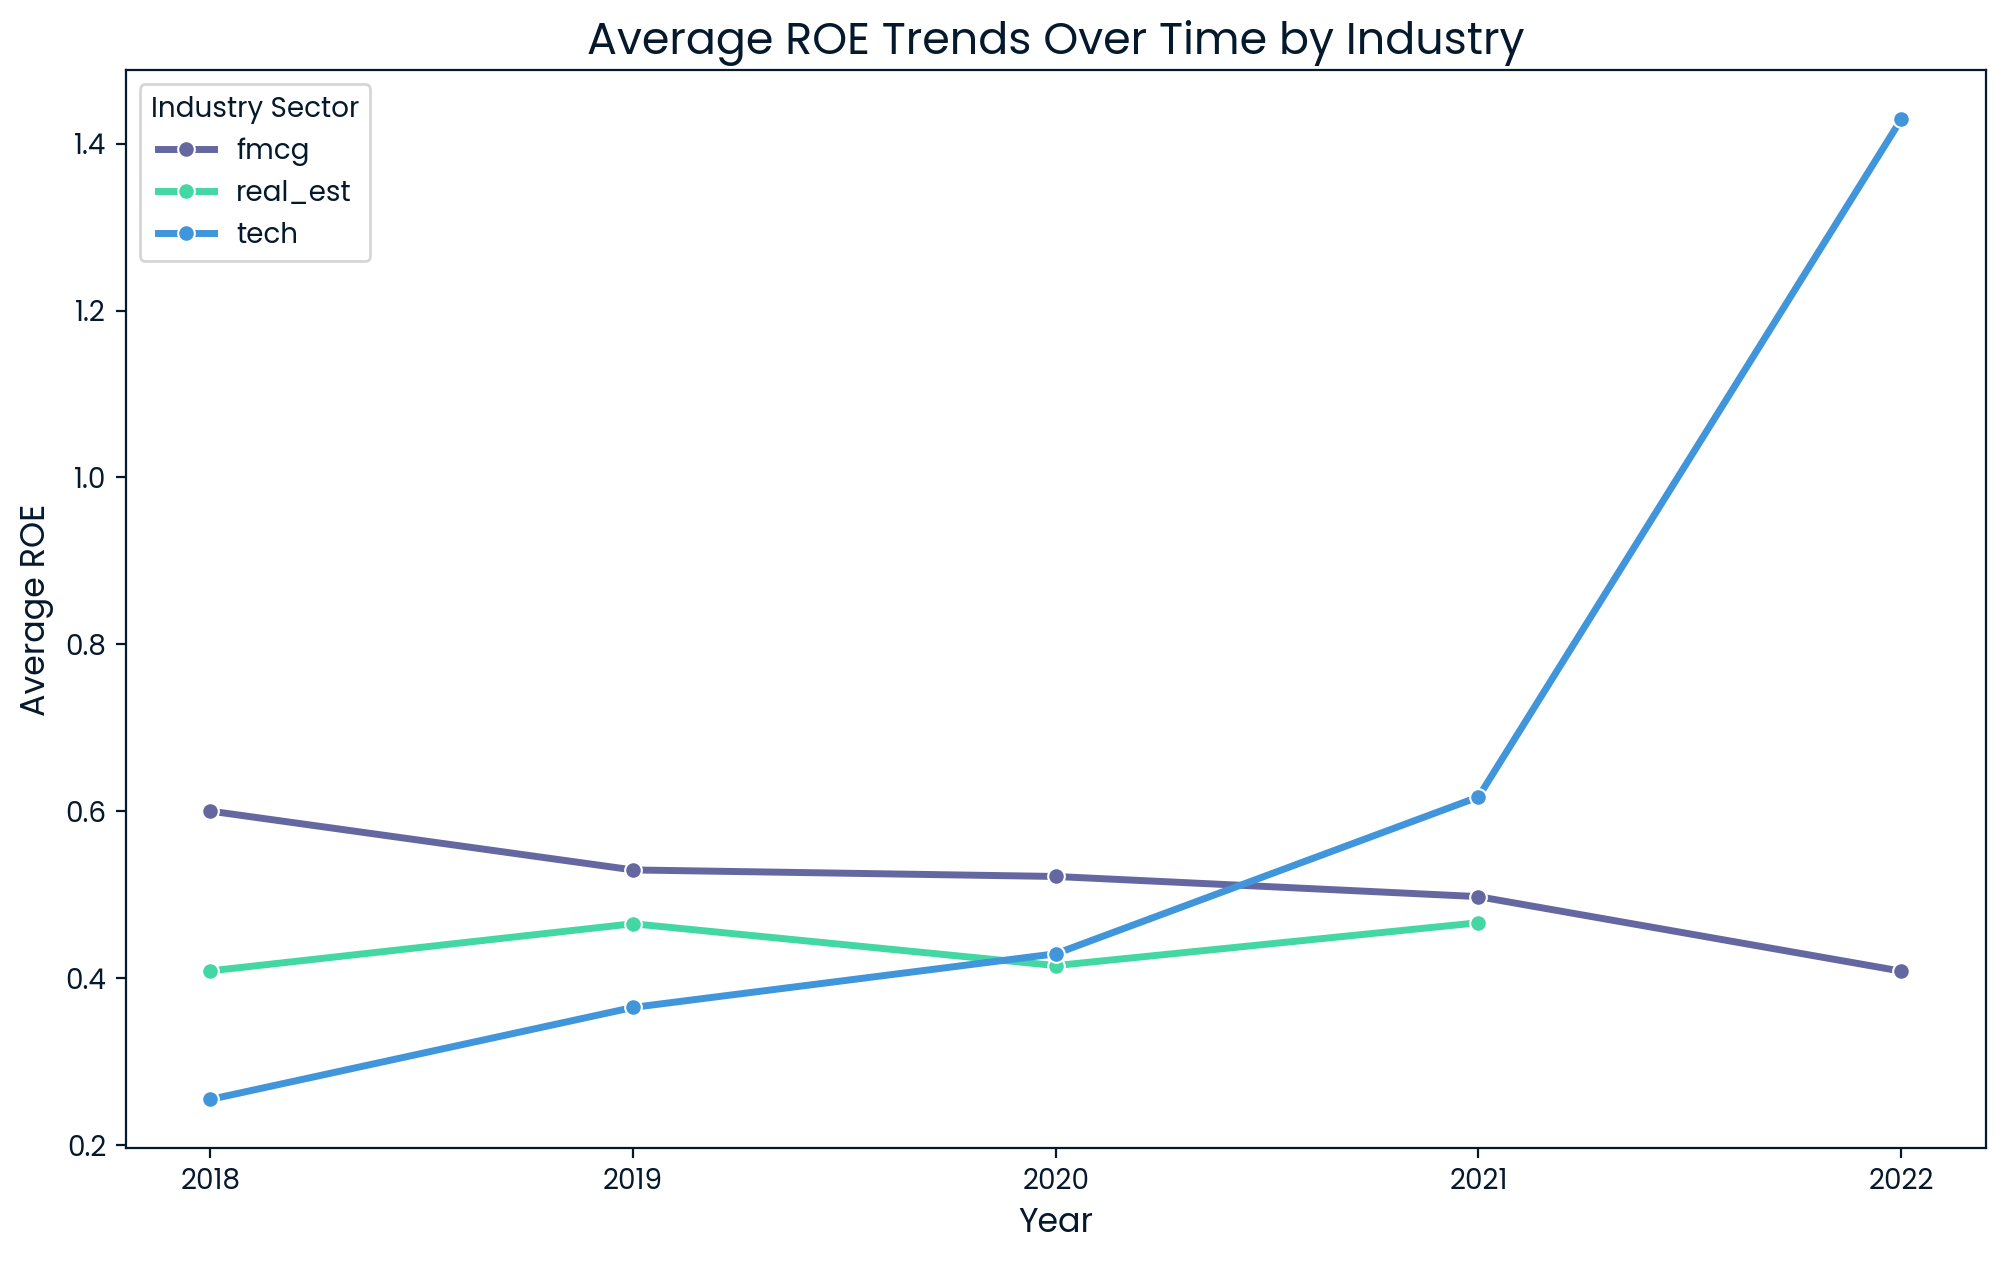

In [3]:
# --- ANALYSIS 2: TREND ANALYSIS OVER TIME ---

trend_analysis = merged_df.groupby(['Year', 'comp_type'])['ROE'].mean().reset_index()

print("\n Average ROE Trends Over Years")
print(trend_analysis.round(2))

# Line Chart: ROE Trends
plt.figure(figsize=(12, 7))
sns.lineplot(data=trend_analysis, x='Year', y='ROE', hue='comp_type', marker='o', linewidth=2.5)
plt.title('Average ROE Trends Over Time by Industry', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average ROE', fontsize=12)
plt.legend(title='Industry Sector')
plt.xticks(trend_analysis['Year'].unique()) 
plt.show()


 Correlation Matrix
                   Net_Profit_Margin   ROE   ROA  Debt_to_Equity  Current_Ratio
Net_Profit_Margin               1.00  0.28  0.33            0.30           0.25
ROE                             0.28  1.00  0.49            0.51          -0.27
ROA                             0.33  0.49  1.00           -0.36           0.47
Debt_to_Equity                  0.30  0.51 -0.36            1.00          -0.50
Current_Ratio                   0.25 -0.27  0.47           -0.50           1.00


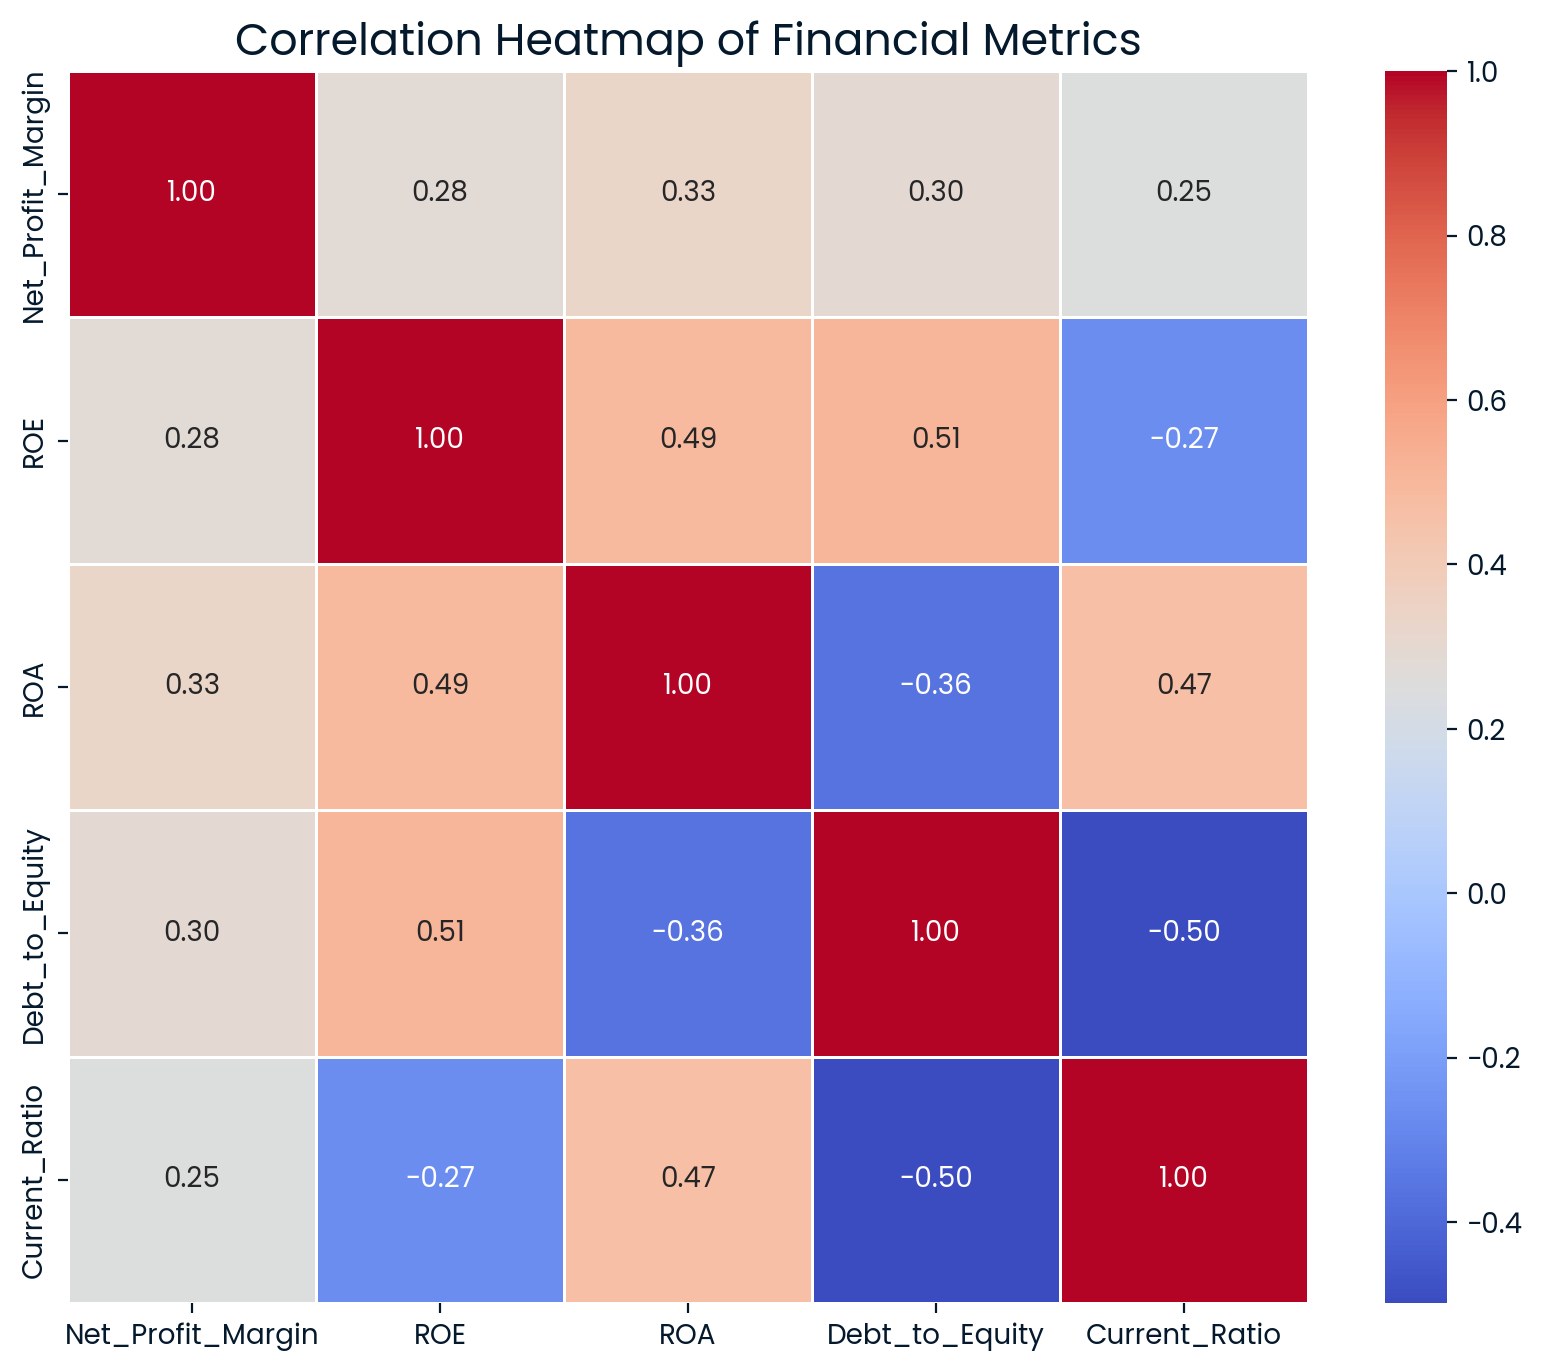

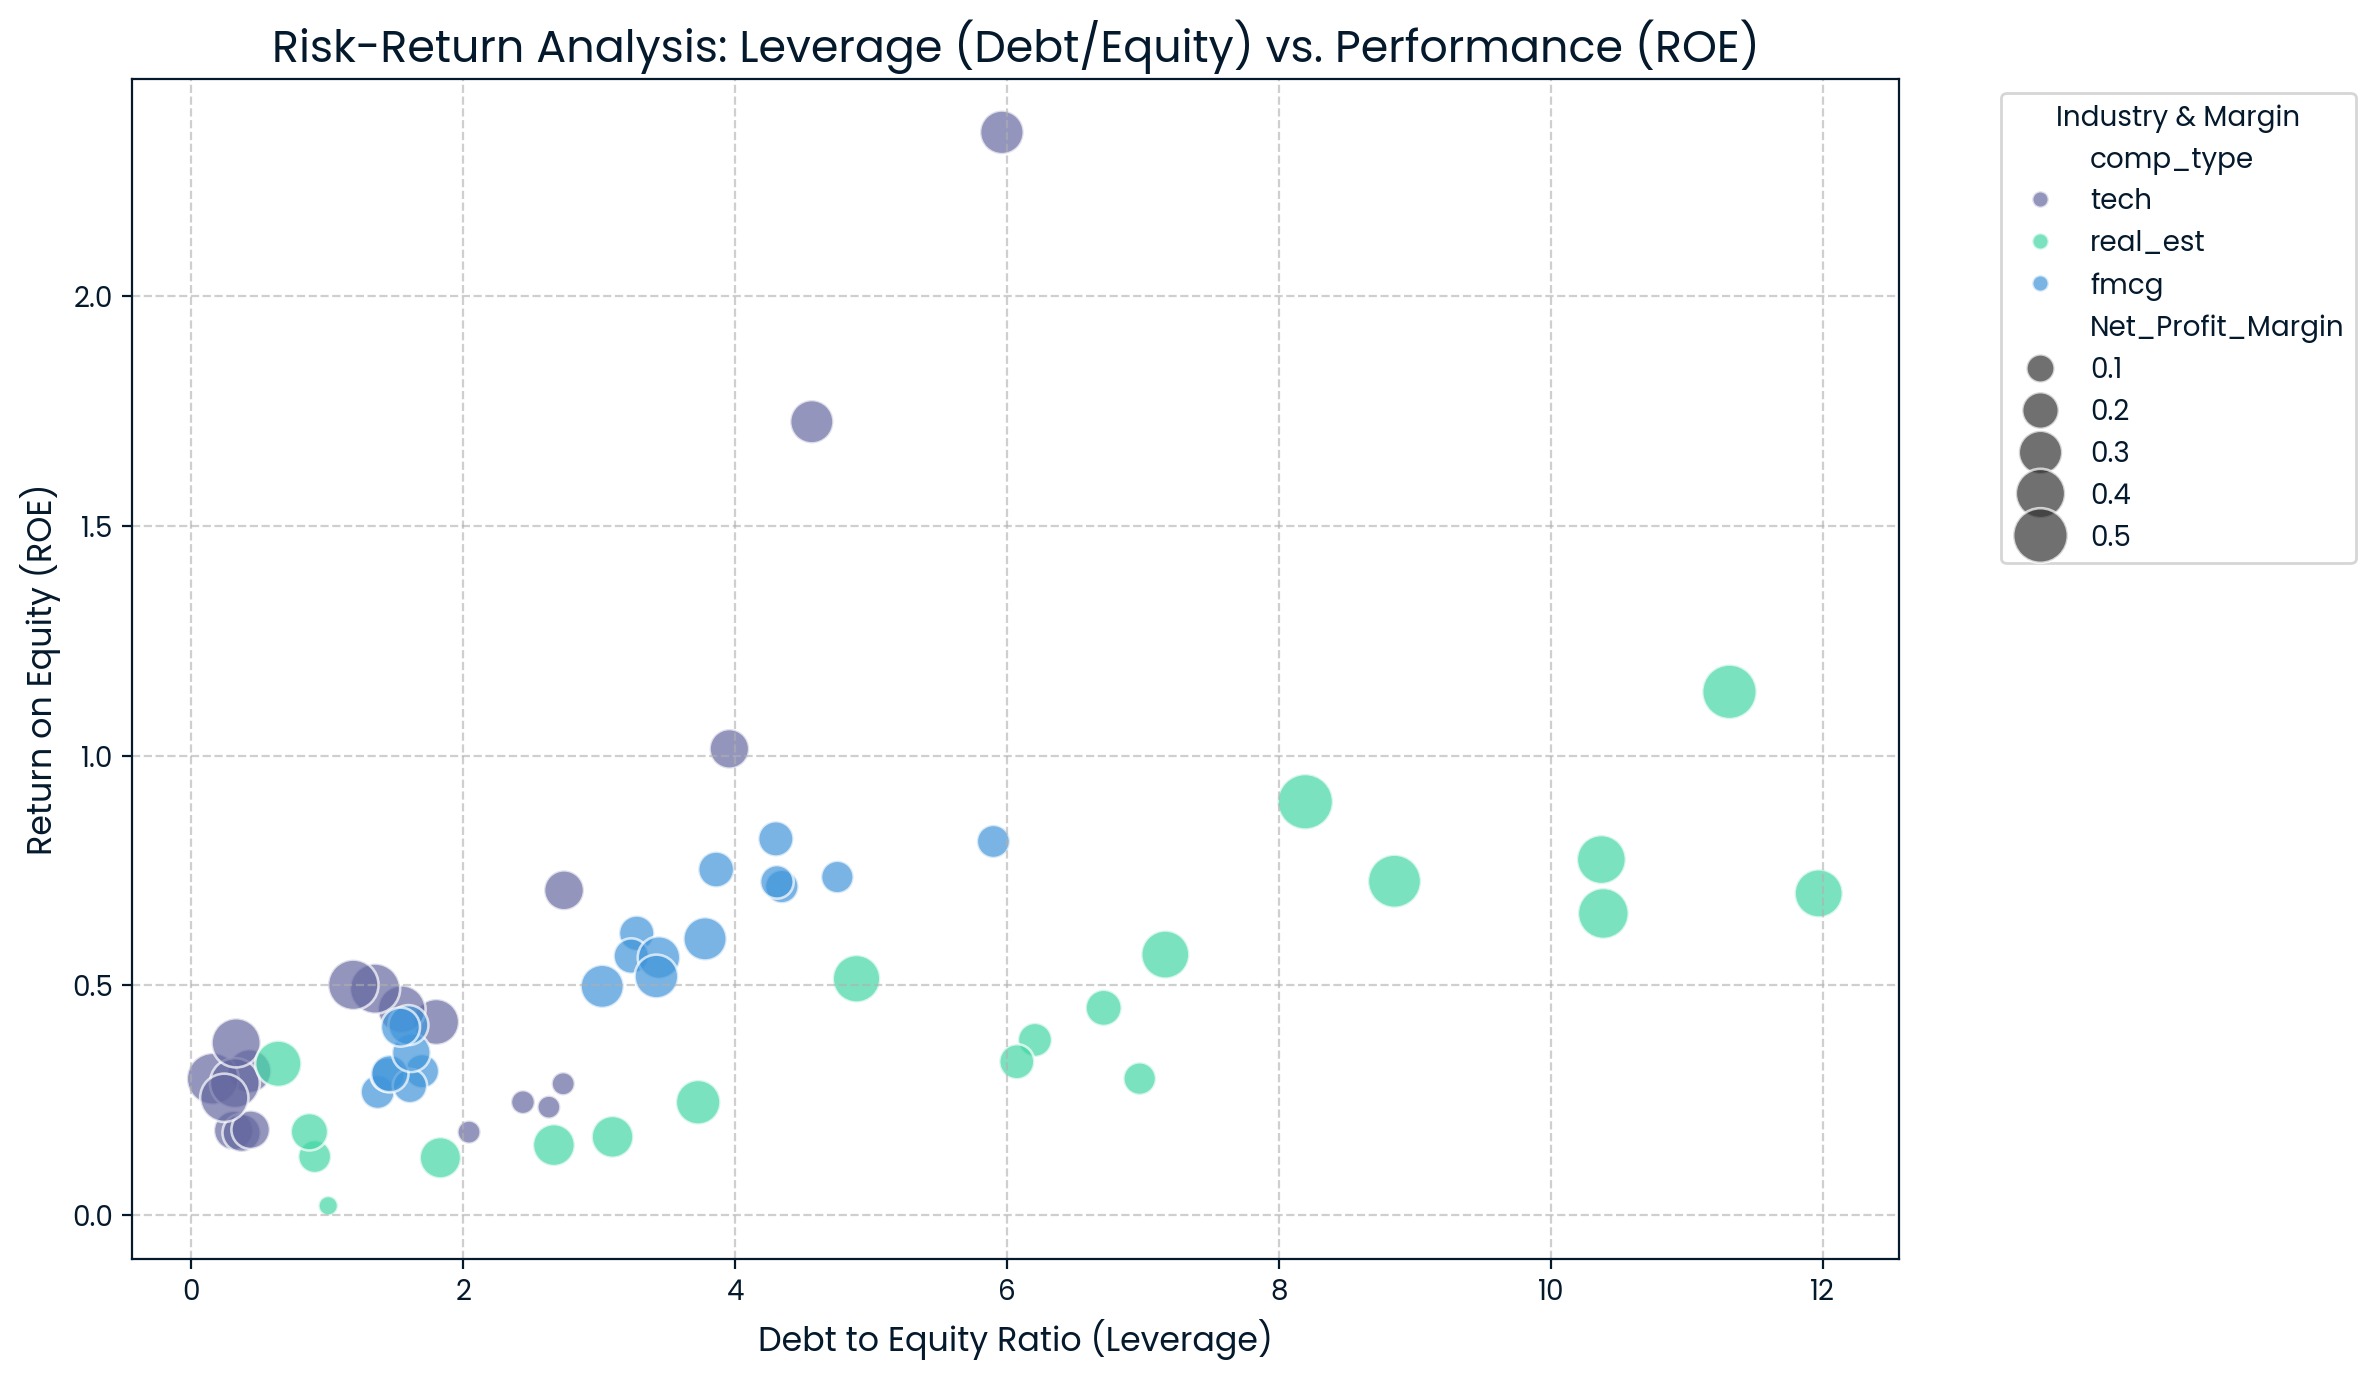

In [4]:
# --- ANALYSIS 3: CORRELATION & RISK-RETURN DIAGNOSTIC ---

corr_matrix = merged_df[['Net_Profit_Margin', 'ROE', 'ROA', 'Debt_to_Equity', 'Current_Ratio']].corr()

print("\n Correlation Matrix")
print(corr_matrix.round(2))

# 1. Heatmap: Financial Metrics Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Financial Metrics', fontsize=16)
plt.show()

# 2. Scatter Plot: Risk vs. Return
plt.figure(figsize=(12, 7))
sns.scatterplot(data=merged_df, 
                x='Debt_to_Equity', 
                y='ROE', 
                hue='comp_type', 
                size='Net_Profit_Margin',
                sizes=(50, 400), 
                alpha=0.7)

plt.title('Risk-Return Analysis: Leverage (Debt/Equity) vs. Performance (ROE)', fontsize=16)
plt.xlabel('Debt to Equity Ratio (Leverage)', fontsize=12)
plt.ylabel('Return on Equity (ROE)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Industry & Margin')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()